In [0]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 28

W0817 17:33:48.365926 140054192416640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 17:33:48.381528 140054192416640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 17:33:48.383885 140054192416640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 17:33:48.445132 140054192416640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0817 17:33:48.453782 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1600, 300)         3000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1600, 64)          57664     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1600, 32)          6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1600, 16)          1552      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 180)               4608180   
__________

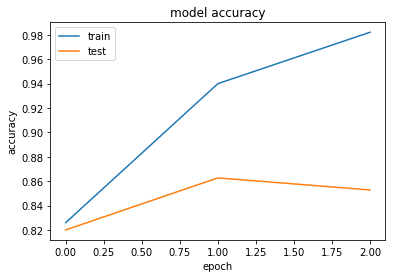

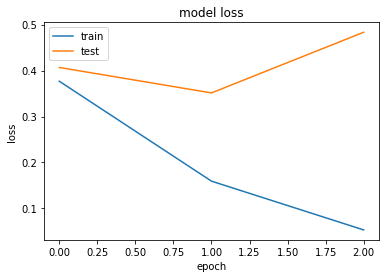

In [0]:
# Pad the sequences to the same length
max_review_length = 1600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
#tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

#model.fit(X_train, y_train, epochs=3, callbacks=[tensorBoardCallback], batch_size=64)
history = model.fit(X_train, y_train, epochs=3, batch_size=64 , validation_data=(X_test, y_test))

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print('test loss, test acc:', scores)
#print("Accuracy: %.2f%%" % (scores[1]*100))

# plot 
print(history.history.keys())
print(history.history)
print(scores)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
from nltk import word_tokenize
from keras.preprocessing import sequence
word2index = imdb.get_word_index()
test=[]
for word in word_tokenize("i did not enjoy this at all"):
     test.append(word2index[word])
print(test)
test=sequence.pad_sequences([test],maxlen=1600)
print(model.predict(test))

[10, 119, 21, 355, 11, 30, 29]
[[0.4569811]]
